## FFT

Algunos links interesantes:

http://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/

https://gist.github.com/tianqig/63e9a9663e7e46ffebe8e2af73ca1b73

https://www.youtube.com/watch?v=spUNpyF58BY


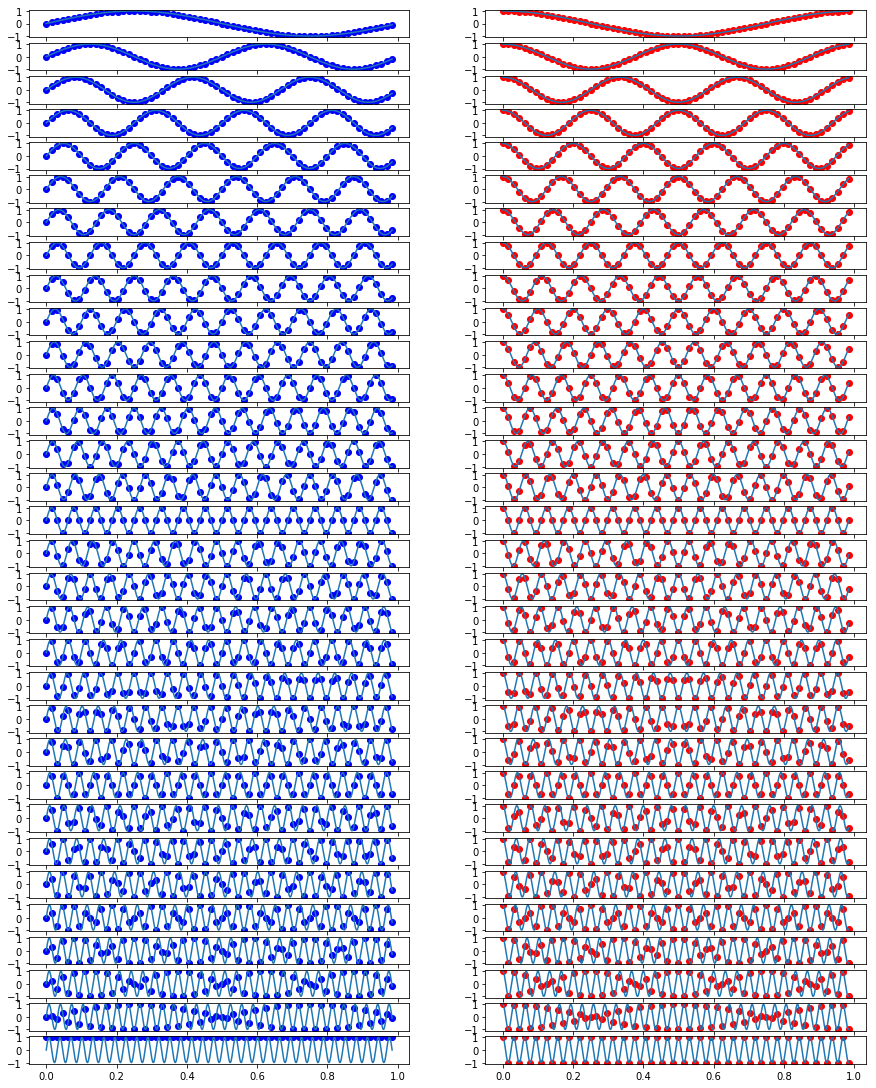

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de señales
T=1
bits=6
N=2**bits
t=np.linspace(0.,T-T/N,N)
taux=np.linspace(0.,T-T/N,N*16)
plt.figure(figsize=(15,20))
vectores=list()
s=np.ones(N)
vectores.append(s/np.linalg.norm(s))
for f in range(1,int(N/2)+1):
    if (f==N/2):
        s=np.ones(N)
    else:
        s=np.sin(2*f*t*np.pi)
        vectores.append(s/np.linalg.norm(s))
    c=np.cos(2*f*t*np.pi)
    vectores.append(c/np.linalg.norm(c))
    saux=np.sin(2*f*taux*np.pi)
    caux=np.cos(2*f*taux*np.pi)
    plt.subplot(N/2+1,2,2*f-1)
    plt.plot(t, s,'bo', taux, saux)
    plt.subplot(N/2+1,2,2*f)
    plt.plot(t, c,'ro',taux, caux)
plt.show()

In [124]:
#Verificación de que los vectores resultados generan una base ortonormal
vectores=np.array(vectores)
print(np.dot(vectores,vectores.T))

[[ 1.00000000e+00  5.94142791e-17 -8.67361738e-17 ...  8.61723887e-16
   1.25593980e-15  0.00000000e+00]
 [ 5.94142791e-17  1.00000000e+00 -2.88814666e-17 ...  3.95243144e-16
  -2.20668768e-15 -1.43114687e-17]
 [-8.67361738e-17 -2.88814666e-17  1.00000000e+00 ... -2.52908327e-15
   3.86157698e-16 -6.93889390e-18]
 ...
 [ 8.61723887e-16  3.95243144e-16 -2.52908327e-15 ...  1.00000000e+00
   1.69213492e-15  5.86770216e-16]
 [ 1.25593980e-15 -2.20668768e-15  3.86157698e-16 ...  1.69213492e-15
   1.00000000e+00  1.05471187e-15]
 [ 0.00000000e+00 -1.43114687e-17 -6.93889390e-18 ...  5.86770216e-16
   1.05471187e-15  1.00000000e+00]]


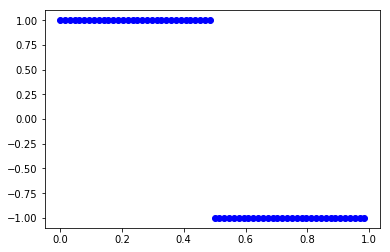

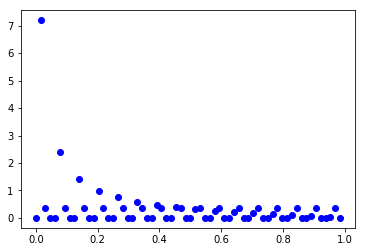

In [131]:
#Puedo representar una señal de entrada en la nueva base:
x=np.hstack([np.ones(int(N/2)),-np.ones(int(N/2))])
x_prime=np.dot(vectores,x.T).T
x_prime
plt.plot(t, x,'bo')
plt.show()
plt.plot(t, x_prime,'bo')
plt.show()

In [132]:
x_rec=np.dot(vectores.T,x_prime.T)
x_rec

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

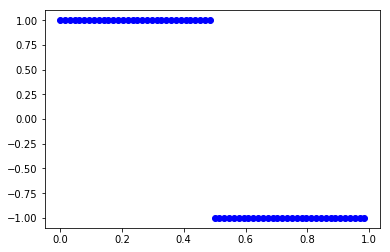

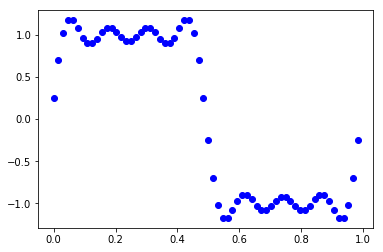

In [138]:
# Puedo quedarme solo con una parte del espectro. En este sentido no se preservan las direcciones del espacio en función de la energía de la señal, sino que se preservan en función de sus componentes espectrales
vec_red=vectores[0:int(N/4),:]
x_prime=np.dot(vec_red,x.T).T
x_rec=np.dot(vec_red.T,x_prime.T)
x_rec
plt.plot(t, x,'bo')
plt.show()
plt.plot(t, x_rec,'bo')
plt.show()

Ver uso de las identidades trigonométricas y representación compleja



In [139]:
from numpy.fft import fft